# Storing and Loading data in `aeon`

Getting data into the correct data structure is fundamental. This notebook describes
the data structures used in `aeon` and links to more complex use cases. `aeon` models
two abstract data types: **single series** and **collections of series**.

A single time series can be univariate (each observation is a single value) or
multivariate (each observation is a vector). We say that the length of the vector
(its dimension) is the number of channels, which in code we denote `n_channels`.
The length of the series is called  the number of timepoints, or `n_timepoints` in
code. We generally store a single series in a 2D numpy array with shape
`(n_channels, n_timepoints)`, though data can be passed the other way around in some
cases using an `axis` parameter. Series estimators work with a univariate series stored
as a 1D numpy array, but will internally convert to 2D.

In [1]:
import numpy as np

from aeon.visualisation import plot_series, plot_series_collection

(1, 100)


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

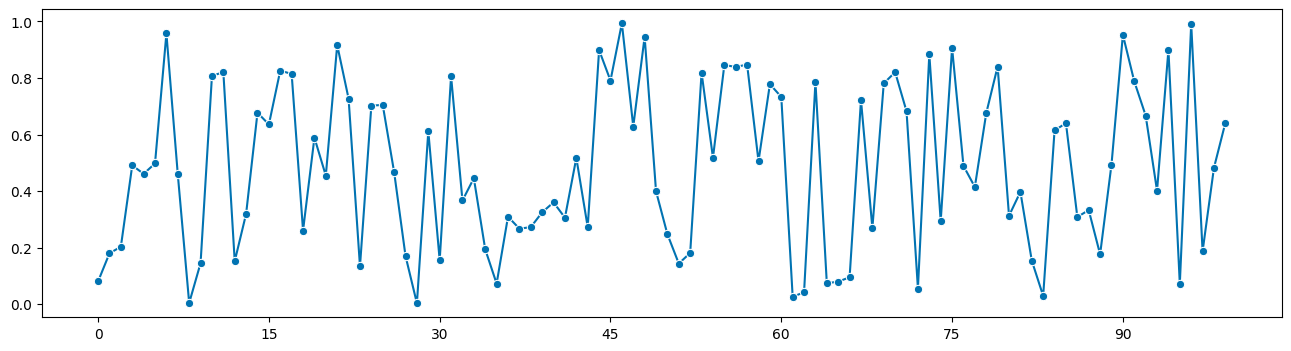

In [2]:
# Univariate series length 100
X = np.random.random((1, 100))
print(X.shape)
plot_series(X)

(3, 200)


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

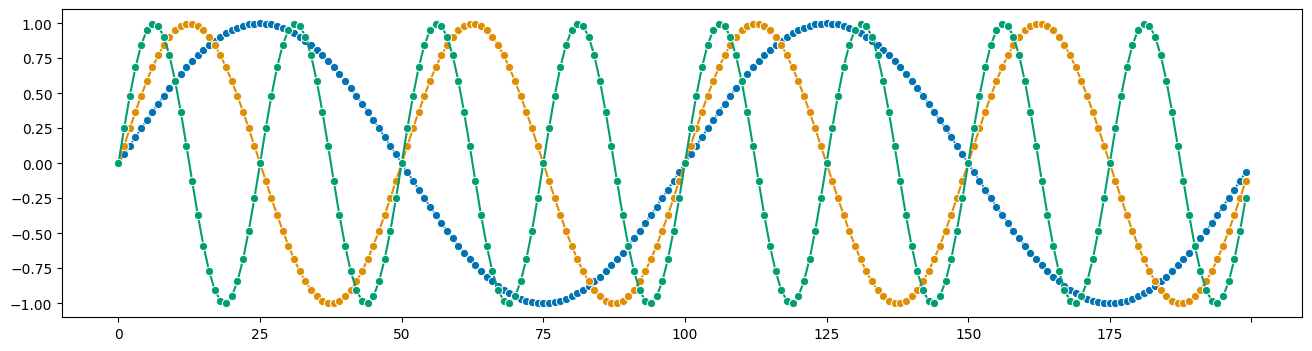

In [3]:
# Three channel multivariate series length 200
X = np.array(
    [
        np.sin(np.arange(0, np.pi * 4, np.pi * 4 / 200)),
        np.sin(np.arange(0, np.pi * 8, np.pi * 8 / 200)),
        np.sin(np.arange(0, np.pi * 16, np.pi * 16 / 200)),
    ]
)
print(X.shape)
plot_series(X)

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

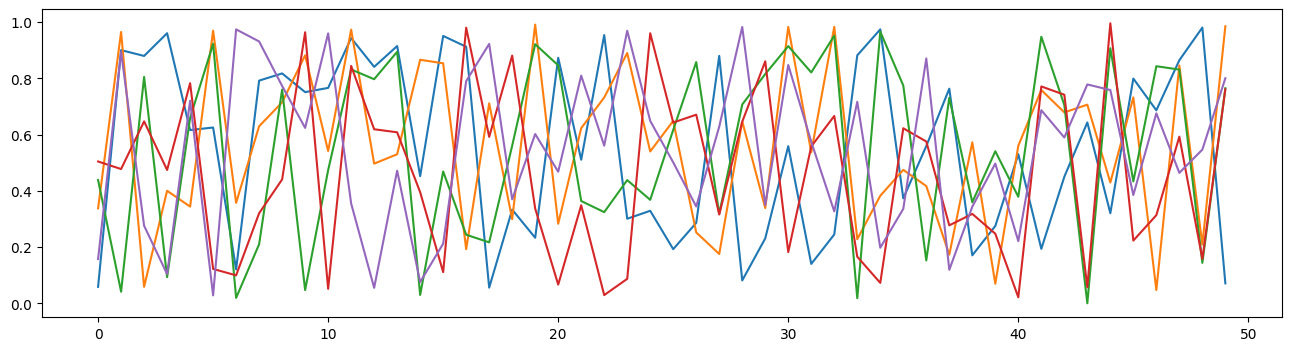

In [4]:
# Collection of 5 univariate series of length 50
X = np.random.random((5, 1, 50))
plot_series_collection(X)

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

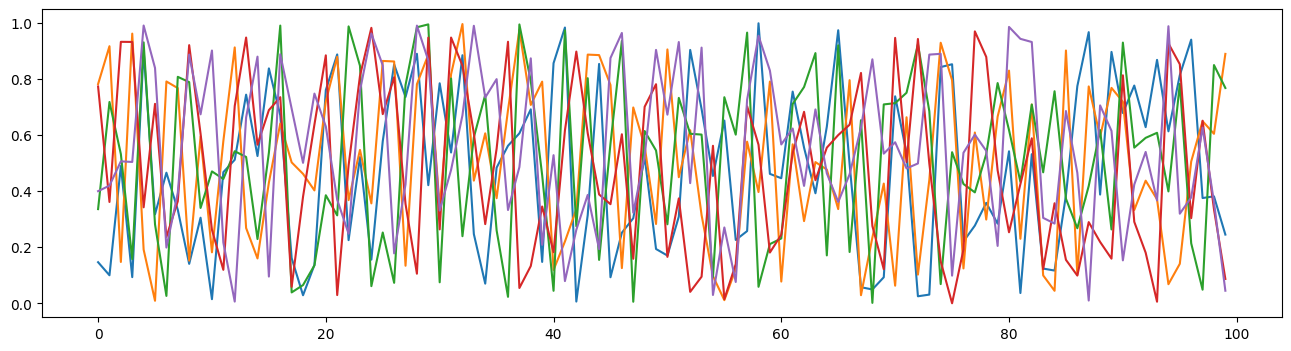

In [5]:
# Collection of 5 multivariate time series with 26 channels, length 100
X = np.random.random((5, 26, 100))
plot_series_collection(X)

## Why this shape?

We get asked this a lot. Packages like tensorflow assume  ``(n_cases, n_timepoints,
n_channels)`` rather than ``(n_cases, n_channels, n_timepoints)``. tl;dr: its a
decision we made early on because many estimators iterate over channels, and we are
not changing it now. It is simple to reshape.


Supervised collection algorithms (e.g. classifiers , regressors and some collection
transformers) require a target variable for training. In keeping with
`scikit-learn`, we denote the target `y`. For classification, `y` should be a numpy
array of strings or integers. For regression, `y` should be a numpy array of integers
 or floats. The `DummyClassifier` used below simply predicts the majority class in
 the train data. The `DummyRegressor` predicts the mean of the training target variable.

In [6]:
import numpy as np

from aeon.classification import DummyClassifier
from aeon.regression import DummyRegressor

X = np.random.random((5, 1, 10))  # Collection of five series
y1 = np.array(["run", "walk", "run", "run", "walk"])
y2 = np.array([1, 0, 1, 1, 0])
y3 = np.array([0.5, 1.11, 0.545, -0.3675, 2.662])
cls = DummyClassifier()
reg = DummyRegressor()
cls.fit(X, y1)
print(cls.predict(X))
cls.fit(X, y2)
print(cls.predict(X))
reg.fit(X, y2)
print(reg.predict(X))
reg.fit(X, y3)
print(reg.predict(X))

['run' 'run' 'run' 'run' 'run']
[1 1 1 1 1]
[0.6 0.6 0.6 0.6 0.6]
[0.8899 0.8899 0.8899 0.8899 0.8899]



If your collection of series are unequal length, we store them in a list of 2D numpy
arrays. See the [unequal length collections](data_unequal.ipynb). aeon does not
currently support single series with unequal length channels.

`aeon` ships with a range of datasets used in examples and testing. The [provided
datasets notebook](provided_data.ipynb) describes all these datasets.

`aeon` provides functions to load data directly from text files in several formats.
The [data loading notebook](data_loading.ipynb) describes the formats of our
supported files and how to load them into aeon data structures.

You can load data directly from the [Time Series Machine Learning
archive](https://timeseriesclassification.com/) and the
[Monash time series forecasting](https://forecastingdata.org/)
sites. More details in the [load from web notebook](load_data_from_web.ipynb).